# SwarmPRM  + Time

In [2]:
%matplotlib inline

## Road Map tests


#### Import and setup

In [3]:
import glob
from matplotlib import pyplot as plt
import numpy as np

from swarm_prm.envs.roadmap import MapLoader
from swarm_prm.envs.instance import Instance
from swarm_prm.solvers.utils.gaussian_utils import GaussianGraphNode
from swarm_prm.solvers.utils.gaussian_prm import GaussianPRM


### Visualizing Maps

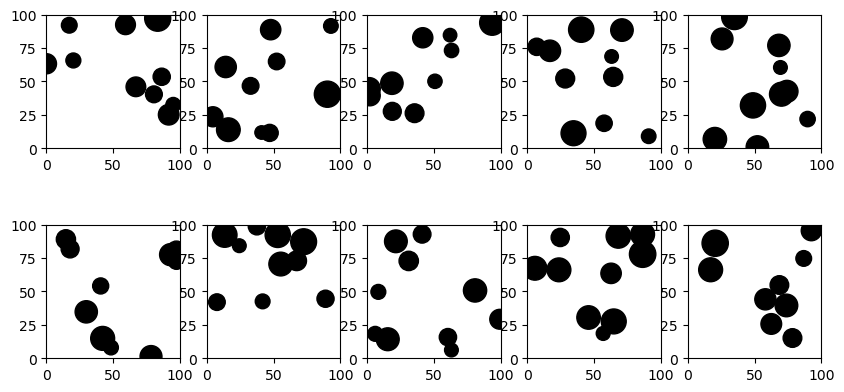

In [11]:
map_dir = "../data/envs/maps/*"

fig, axs = plt.subplots(2, 5, figsize=(10, 5))

# Visualize the first 10 maps
for idx, map_fname in enumerate(glob.glob(map_dir)[:10]):
    row = idx // 5
    col = idx % 5
    map_loader = MapLoader(map_fname)
    map = map_loader.get_map()
    map.visualize(ax=axs[row][col])

### Curated example

(<Figure size 640x480 with 1 Axes>, <Axes: >)

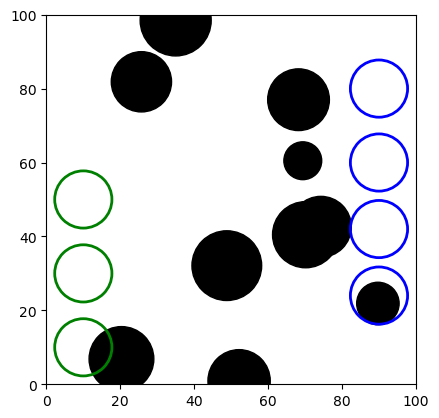

In [17]:
### PARAMETERS ###

# Map config
map_fname = "../data/envs/maps/map_6.yaml"
map_loader = MapLoader(map_fname)
map = map_loader.get_map()
num_samples = 500 # number of sample points

# Agent config
num_agent = 10
agent_radius = 1
# sampling_method = "GAUSSIAN_SAMPLING"
#sampling_method = "SWARMPRM_SAMPLING"
sampling_method = "HEXAGON"
TEST_CVAR = False


# Curated test instance
starts = np.array([[10, 10], [10, 30], [10, 50]])
goals = np.array([[90, 42], [90, 60], [90, 80], [90, 24]])

starts_weight = np.array([0.3, 0.4, 0.3])
goals_weight = np.array([0.1, 0.2, 0.4, 0.3])

g_starts = [GaussianGraphNode(start, np.identity(2)*10) for start in starts]
g_goals = [GaussianGraphNode(goal, np.identity(2)*10) for goal in goals]

instance = Instance(map, g_starts, g_goals, starts_weight, goals_weight )
instance.visualize()



#### Sampling Roadmap



In [ ]:
# Swarm PRM sampling method
gaussian_prm = GaussianPRM(instance, num_samples)
gaussian_prm.sample_free_space(sampling_strategy=sampling_method)
gaussian_prm.load_instance()
gaussian_prm.build_roadmap(roadmap_method="TRIANGULATION", collision_check_method="CVAR")
gaussian_prm.visualize_roadmap("test_map")
gaussian_prm.visualize_g_nodes("test_g_nodes")




### TEG 

In [ ]:
from swarm_prm.solvers.macro.teg import TEGGraph 

teg_graph= TEGGraph(gaussian_prm, agent_radius, num_agents=num_agent)
max_flow, flow_dict, timestep, teg = teg_graph.get_earliest_timestep()
print("max flow", max_flow)
print("timestep", timestep)
print("flow_dict", flow_dict)
assert max_flow is not None, "Unable to find solution within the given timesteps"


In [ ]:
# gaussian_prm.visualize_solution(flow_dict, timestep, num_agent)
simple_paths, gaussian_paths = gaussian_prm.get_solution(flow_dict, timestep, num_agent)

In [ ]:
# gaussian_prm.animate_solution(flow_dict, timestep, num_agent)